##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Essential Guide to Transformer Models

**참고 Link**
  1. [Attention is All You Need (2017)](https://arxiv.org/abs/1706.03762)
  2. [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)
  3. [The Illustrated Transformer(한국어 번역본)](https://nlpinkorean.github.io/illustrated-transformer/)
  4. [Illustrated Guide to Transformers- Step by Step Explanation](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)
  5. [Transformer: Attention Is All You Need (꼼꼼한 딥러닝 논문 리뷰와 코드 실습)](https://www.youtube.com/watch?v=AA621UofTUA&list=PLRx0vPvlEmdADpce8aoBhNnDaaHQN1Typ&index=8)

<br>

  - The Transformer was proposed in the paper [Attention is All You Need](https://arxiv.org/abs/1706.03762).
  - Transformers are taking the natural language processing world by storm.
    - These incredible models are breaking multiple NLP records and pushing the state of the art.
      - They are used in many applications like:
        - Machine Language Translation 
        - Conversational Chatbots 
        - Google search engines
  - Even outside of NLP, you can also find transformers in the fields of computer vision and music generation.

  - Fairwell to RNN

  <img src='http://www.mccormickml.com/assets/BERT/BERT_Mountain.png'>

  - [Various Model Architectures of Transformer](https://github.com/huggingface/transformers#model-architectures)

  

## Attention Mechanism

To understand transformers we first must understand the attention mechanism. 

The Attention mechanism enables the transformers to have extremely long term memory. A transformer model can “attend” or “focus” on all previous tokens that have been generated.

<br>
<img src='https://miro.medium.com/max/1050/0*CoVkXTogdhlfjSw_.png'>
<br><br>

<img src='https://miro.medium.com/max/960/0*ODlgeguKzjyzjuuJ.gif'>

<br><br>

### Recurrent neural networks (RNN)의 단점

  - Short-term memory (Shorter window to refrence from) 
    - When the story gets longer, RNN’s can’t access words generated earlier in the sequence. 
    - This is still true for Gated Recurrent Units (GRU’s) and Long-short Term Memory (LSTM’s) networks.
  - By nature, RNN is sequential. (no parallel computing)

<br>

### Attention Mechanism 

The attention mechanism, In theory, and given enough compute resources, have an infinite window to reference from, therefore being capable of using the entire context of the story while generating the text.

<br>

<img src = 'https://miro.medium.com/max/960/1*w2OJ4jfjxmlcqu6k4BdgrA.gif'>

<br>
<br>



## High-level View of Transformer Architecture

  - Let’s begin by looking at the model as a single black box. In a machine translation application, it would take a sentence in one language, and output its translation in another.

<img src='https://jalammar.github.io/images/t/the_transformer_3.png'>

- A different view

    <img src='https://jalammar.github.io/images/t/The_transformer_encoders_decoders.png'>

    - The encoding component is a stack of encoders (the paper stacks six of them on top of each other – there’s nothing magical about the number six)

<img src='https://jalammar.github.io/images/t/The_transformer_encoder_decoder_stack.png'>

<img src= 'https://hackernoon.com/_next/image?url=https%3A%2F%2Fcdn.hackernoon.com%2Fimages%2FZ7ZkCzqpkBdXJ4DMKYwft6zCe9q1-3t1235mt.jpeg&w=1920&q=75'>

  - The encoders are all identical in structure (yet they do not share weights). Each one is broken down into two sub-layers:

    <img src='https://jalammar.github.io/images/t/Transformer_encoder.png'>

      - On a high level, the encoder maps an input sequence into an abstract continuous representation that holds all the learned information of that input. 

    - The decoder has both those layers, but between them is an attention layer that helps the decoder focus on relevant parts of the input sentence
    <img src='https://jalammar.github.io/images/t/Transformer_decoder.png'>

    - On a high level, the decoder then takes that continuous representation and step by step generates a single output while also being fed the previous output.

<br>

  - Detailed Look

<img src='https://i.stack.imgur.com/eAKQu.png'>




## Detailed View of Transformer Architecture


```
We’ll demonstrate how it’ll work for a conversational chatbot.

  Our Input: “Hi how are you”
  Transformer Output: “I am fine”
````
### Input Embeddings

The first step is feeding out input into a word embedding layer.

<img src= 'https://miro.medium.com/max/437/0*6MnniQMOBPu4kFq3.png'>


### Positional Encoding

참고 Link: 

[1. Transformer Architecture: The Positional Encoding](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/)

[2. Master Positional Encoding, Part 1](https://towardsdatascience.com/master-positional-encoding-part-i-63c05d90a0c3)


The next step is to inject positional information into the embeddings.

<img src='https://d33wubrfki0l68.cloudfront.net/a76be57763d942798f8081b77edf8f078720cd45/bd31a/img/transformer_architecture_positional_encoding/model_arc.jpg'>

__Position and order of words are the essential parts of any language.__ They define the grammar and thus the actual semantics of a sentence.

__Recurrent Neural Networks (RNNs) inherently take the order of word into account__; They parse a sentence word by word in a sequential manner.

But the __Transformer architecture ditched the recurrence mechanism in favor of multi-head self-attention mechanism.__ Avoiding the RNNs’ method of recurrence will result in massive speed-up in the training time. And theoretically, it can capture longer dependencies in a sentence.

__As each word in a sentence simultaneously flows through the Transformer’s encoder/decoder stack, The model itself doesn’t have any sense of position/order for each word.__ Consequently, there’s still the need for a way to incorporate the order of the words into our model.

__One possible solution to give the model some sense of order is to add a piece of information to each word about its position in the sentence. We call this “piece of information”, the positional encoding.__

This is done using positional encoding. The authors came up with a clever trick using sin and cosine functions.

<img src='https://miro.medium.com/max/1050/0*PuV87IVkFin98EZW.png'>

<img src='https://jalammar.github.io/images/t/transformer_positional_encoding_vectors.png'>

<img src='https://jalammar.github.io/images/t/transformer_positional_encoding_example.png'>

<img src='https://jalammar.github.io/images/t/transformer_positional_encoding_large_example.png'>



### Encoder Layer


<img src='https://miro.medium.com/max/846/0*gxx0-uUpZfAmKmPa.png'>

  - The Encoders layers job is to map all input sequences into an abstract continuous representation that holds the learned information for that entire sequence. 
  - It contains 2 sub-modules, multi-headed attention, followed by a fully connected network. 

  <img src='https://hackernoon.com/_next/image?url=https%3A%2F%2Fcdn.hackernoon.com%2Fimages%2FZ7ZkCzqpkBdXJ4DMKYwft6zCe9q1-bx1e35i5.jpeg&w=1920&q=75'>

  - There are also residual connections around each of the two sublayers followed by a layer normalization.
  - Residual connections are the same thing as 'skip connections'. They are used to allow gradients to flow through a network directly, without passing through non-linear activation functions.
  - The layer normalizations are used to stabilize the network which results in substantially reducing the training time necessary.


<br>

#### Data Flow

  - An encoder block expects its inputs to be of the shape $S\times D$.
    - $S$ = length of the sentence
    - $D$ = dimension of the embedding whose weights can be trained with the network.
  - Note that input and output shapes are the same

<img src='https://hackernoon.com/_next/image?url=https%3A%2F%2Fcdn.hackernoon.com%2Fimages%2FZ7ZkCzqpkBdXJ4DMKYwft6zCe9q1-lu1s35gs.jpeg&w=1920&q=75'>





#### Multi-Headed Attention

  - Multi-headed attention in the encoder applies a specific attention mechanism called self-attention. 
  - Self-attention allows the models to associate each word in the input, to other words. 
    - So in our example, it’s possible that our model can learn to associate the word “you”, with “how” and “are”. 
    - It’s also possible that the model learns that words structured in this pattern are typically a question so respond appropriately.

    <img src = 'https://miro.medium.com/max/669/0*mupwYy99Watj1GJT.png'>

<br>



##### Self-Attention Layer

<img src= 'https://pbs.twimg.com/media/Et1JSjMVEAAGgLT?format=png&name=900x900'>

<br>
<br>
<img src='https://hackernoon.com/_next/image?url=https%3A%2F%2Fcdn.hackernoon.com%2Fimages%2FZ7ZkCzqpkBdXJ4DMKYwft6zCe9q1-762235qa.jpeg&w=3840&q=75'>

  - The self-attention layer __initializes with 3 weight matrices — Query ($W_Q$), Key ($W_K$), and Value ($W_V$)__.
    - Each of these matrices has a size of $D\times d$ where $d$ is taken as 64 in the paper "Attention is all you need",

  - Step 0: (Calc 1 in the figure), we create matrices Q, K, and V by multiplying the input with the respective Query, Key, and Value matrix.

      $$Q=X\cdot W_Q$$ 
      $$K=X\cdot W_K$$
      $$V=X\cdot W_V$$

  - Step 1: compute a score matrix by multiply $Q$ with $K^T$

      $$ \text{Attention Score} = Q\cdot K^T, \text{dim} = S\times S  $$
      - The score matrix determines how much focus should a word be put on other words. 
      - So each word will have a score that corresponds to other words in the time-step. The higher the score the more focus. This is how the queries are mapped to the keys.

  - Step 2: Scale down the above attention score matrix by dividing $\sqrt d$.

  - Step 3: Apply the softmax function to the scaled attention score

      $$\text{softmax} \bigg(\frac {Q\cdot K^T}{\sqrt d} \bigg)$$

  - Step 4: Multiply softmax output with value vector V to get the output vector.

      $$S = D(Q,K,V) = \text{softmax} \bigg(\frac {Q\cdot K^T}{\sqrt d} \bigg)\cdot V, \text {dim} = S \times d$$

      - The higher softmax scores will keep the value of words the model learns is more important. 
        - The lower scores will drown out the irrelevant words. 
      - Then you feed the output of that into a linear layer to process.

    
  


##### Query, Key, and Value Vectors

To achieve self-attention, we feed the input into 3 distinct fully connected layers to create the query, key, and value vectors.
What are these vectors exactly? 
I found a [good explanation on stack exchange](https://stats.stackexchange.com/questions/421935/what-exactly-are-keys-queries-and-values-in-attention-mechanisms) stating….

>
>The query key and value concept come from retrieval systems.
>
> For example, when you type a query to search for some video on Youtube, the search engine will map your query against a set of keys (video title, description etc.) associated with candidate videos in the database, then present you the best  matched videos (values).
>



##### Step by Step Detailed Guide

  - Step 0: Compute matrices Q, K, and V by multiplying the input with the respective Query, Key, and Value matrix.

      $$Q=X\cdot W_Q$$ 
      $$K=X\cdot W_K$$
      $$V=X\cdot W_V$$

  - Step 1: compute a score matrix by multiply $Q$ with $K^T$

      $$ \text{Attention Score} = Q\cdot K^T, \text{dim} = S\times S  $$

    <img src= 'https://miro.medium.com/max/960/1*kxR_DjBgFw7LTTN-Ut34Pw.gif'>

    <img src ='https://miro.medium.com/max/675/0*D8GA7_DsjTfudI0-.png'>

<br>

    - Each word will have a score that corresponds to other words in the time-step. 
    - The higher the score the more focus. This is how the queries are mapped to the keys.


  - Step 2: Scale down the above attention score matrix by dividing $\sqrt d$.

    <img src='https://miro.medium.com/max/716/0*VKdRa5TC6jJmKZ-0.png'>

  - Step 3: Apply the softmax function to the scaled attention score

      $$\text{softmax} \bigg(\frac {Q\cdot K^T}{\sqrt d} \bigg)$$

    <img src='https://miro.medium.com/max/1050/0*qSKUxncfQVhUJeCr.png'>

  - Step 4: Multiply softmax output with value vector V to get an output vector.

      $$S = D(Q,K,V) = \text{softmax} \bigg(\frac {Q\cdot K^T}{\sqrt d} \bigg)\cdot V, \text {dim} = S \times d$$

      <img src='https://miro.medium.com/max/951/0*dv4q_I1gubq2xua1.png'>

      - The higher softmax scores will keep the value of words the model learns is more important. 
        - The lower scores will drown out the irrelevant words. 
      - Then you feed the output of that into a linear layer to process.
  


#### Computing Multi-headed Attention

Multi-head Attention is a module for attention mechanisms which runs through an attention mechanism several times in parallel. The independent attention outputs are then concatenated and linearly transformed into the expected dimension. Intuitively, multiple attention heads allows for attending to parts of the sequence differently (e.g. longer-term dependencies versus shorter-term dependencies).

<img src='https://production-media.paperswithcode.com/methods/multi-head-attention_l1A3G7a.png'>

<img src ='https://jalammar.github.io/images/t/transformer_attention_heads_qkv.png'>

  <img src='https://jalammar.github.io/images/t/transformer_attention_heads_z.png'>

<img src='https://jalammar.github.io/images/t/transformer_attention_heads_weight_matrix_o.png'>

<img src='https://jalammar.github.io/images/t/transformer_multi-headed_self-attention-recap.png'>

<img src='https://jalammar.github.io/images/t/transformer_self-attention_visualization_2.png'>





#### The Residual Connections, Layer Normalization, and Feed Forward Network

  - The multi-headed attention output vector is added to the original positional input embedding. This is called a residual connection. 
  - The output of the residual connection goes through a layer normalization.

  <img src = 'https://miro.medium.com/max/960/0*RRWR2BsH5SQgMGo3.gif'>

  - The normalized residual output gets projected through a pointwise feed-forward network for further processing. 
  - The pointwise feed-forward network is a couple of linear layers with a ReLU activation in between. 
  - The output of that is then again added to the input of the pointwise feed-forward network and further normalized.

  <img src='https://miro.medium.com/max/960/0*-fdpoPbN-BHAMRnr.gif'>

  - The residual connections help the network train, by allowing gradients to flow through the networks directly. 
  - The layer normalizations are used to stabilize the network which results in substantially reducing the training time necessary. 
  - The pointwise feedforward layer is used to project the attention outputs potentially giving it a richer representation.



### Decoder Layer

  - The decoder’s job is to generate text sequences. 
  - The decoder has a similar sub-layer as the encoder. 
    - it has two multi-headed attention layers, a pointwise feed-forward layer, and residual connections, and layer normalization after each sub-layer. 
    - These sub-layers behave similarly to the layers in the encoder but each multi-headed attention layer has a different job.  
  - The decoder is capped off with a linear layer that acts as a classifier, and a softmax to get the word probabilities.

  <img src = 'https://miro.medium.com/max/3600/0*bXI7F0OiEtbtyy3k.png'>

  - The decoder is autoregressive, it begins with a start token, and it takes in a list of previous outputs as inputs, as well as the encoder outputs that contain the attention information from the input. The decoder stops decoding when it generates a token as an output.

  <img src = 'https://miro.medium.com/max/720/0*u8nSpT8Z8ITwzNLV.gif'>



#### Decoder Input Embeddings & Positional Encoding

  - The beginning of the decoder is pretty much the same as the encoder. 
    - The input goes through an embedding layer and positional encoding layer.  
    - The positional embeddings get fed into the first multi-head attention layer which computes the attention scores for the decoder’s input.


#### Decoders First Multi-Headed Attention

  - This multi-headed attention layer operates slightly differently. 
  - Since the decoder is autoregressive and generates the sequence word by word, you need to prevent it from conditioning to future tokens. 
    - For example, when computing attention scores on the word “am”, you should not have access to the word “fine”, because that word is a future word that was generated after. 
    - The word “am” should only have access to itself and the words before it. This is true for all other words, where they can only attend to previous words.

    <img src = 'https://miro.medium.com/max/818/0*0pqSkWgSPZYr_Sjx.png'>
  
  - We need a method to prevent computing attention scores for future words. 
    - This method is called __masking__. 
    - To prevent the decoder from looking at future tokens, you __apply a look ahead mask__. 
    - The mask is __added before calculating the softmax, and after scaling the scores__.




##### Look-Ahead Mask

  - The mask is a matrix that’s the same size as the attention scores filled with values of 0’s and negative infinities. 
  - When you add the mask to the scaled attention scores, you get a matrix of the scores, with the top right triangle filled with negativity infinities.

  <img src ='https://miro.medium.com/max/1050/0*QYFua-iIKp5jZLNT.png'>

  - The reason for the mask is because once you take the softmax of the masked scores, the negative infinities get zeroed out, leaving zero attention scores for future tokens.
  - As you can see in the figure below, the attention scores for “am”, has values for itself and all words before it but is zero for the word “fine”. This essentially tells the model to put no focus on those words.

  <img src = 'https://miro.medium.com/max/1050/0*3ykVCJ9okbgB0uUR.png'>

  - This masking is the only difference in how the attention scores are calculated in the first multi-headed attention layer. 
  - This layer still has multiple heads, that the mask is being applied to, before getting concatenated and fed through a linear layer for further processing. 
  - The output of the first multi-headed attention is a masked output vector with information on how the model should attend on the decoder’s input.

  <img src='https://miro.medium.com/max/1050/0*4Qos9ymoz4LW1pmP.png'>

  




#### Decoder Second Multi-Headed Attention, and Point-wise Feed Forward Layer

  - For second multi-headed attention layer, the encoder’s outputs are the queries and the keys, and the first multi-headed attention layer outputs are the values. 
    - This process matches the encoder’s input to the decoder’s input, allowing the decoder to decide which encoder input is relevant to put a focus on. 
  - The output of the second multi-headed attention goes through a pointwise feedforward layer for further processing.

#### Linear Classifier and Final Softmax for Output Probabilities

  - The output of the final pointwise feedforward layer goes through a final linear layer, that acts as a classifier. 
  - The classifier is as big as the number of classes you have. 
    - For example, if you have 10,000 classes for 10,000 words, the output of that classier will be of size 10,000. 
  - The output of the classifier then gets fed into a softmax layer, which will __produce probability scores between 0 and 1__. 
    - __We take the index of the highest probability score, and that equals our predicted word__.

    <img src= 'https://miro.medium.com/max/924/0*1OyVUO-s-uBh8EV2.png'>

  - The decoder then takes the output, add’s it to the list of decoder inputs, and continues decoding again until a token is predicted. 
    - For our case, the highest probability prediction is the final class which is assigned to the end token.

  - The decoder can also be stacked N layers high, each layer taking in inputs from the encoder and the layers before it. 
    - By stacking the layers, the model can learn to extract and focus on different combinations of attention from its attention heads, potentially boosting its predictive power.

    <img src='https://miro.medium.com/max/1050/0*e6ZYxwBRleLgzfw8.png'>

    


## And That’s It!

  - Transformers leverage the power of the attention mechanism to make better predictions. 
  - Recurrent Neural networks try to achieve similar things, but because they suffer from short term memory. 
  - Transformers can be better especially if you want to encode or generate long sequences. 
  - Because of the transformer architecture, the natural language processing industry can achieve unprecedented results.



# Coding Practice

This tutorial trains a <a href="https://arxiv.org/abs/1706.03762" class="external">Transformer model</a> to translate Portuguese to English. This is an advanced example that assumes knowledge of [text generation](text_generation.ipynb) and [attention](nmt_with_attention.ipynb).

The core idea behind the Transformer model is *self-attention*—the ability to attend to different positions of the input sequence to compute a representation of that sequence. Transformer creates stacks of self-attention layers and is explained below in the sections *Scaled dot product attention* and *Multi-head attention*.

A transformer model handles variable-sized input using stacks of self-attention layers instead of [RNNs](text_classification_rnn.ipynb) or [CNNs](../images/intro_to_cnns.ipynb). This general architecture has a number of advantages:

* It make no assumptions about the temporal/spatial relationships across the data. 
* Layer outputs can be calculated in parallel, instead of a series like an RNN.
* Distant items can affect each other's output without passing through many RNN-steps, or convolution layers (see [Scene Memory Transformer](https://arxiv.org/pdf/1903.03878.pdf) for example).
* It can learn long-range dependencies. This is a challenge in many sequence tasks.

The downsides of this architecture are:

* For a time-series, the output for a time-step is calculated from the *entire history* instead of only the inputs and current hidden-state. This _may_ be less efficient.   
* If the input *does* have a  temporal/spatial relationship, like text, some positional encoding must be added or the model will effectively see a bag of words. 

After training the model in this notebook, you will be able to input a Portuguese sentence and return the English translation.

<img src="https://www.tensorflow.org/images/tutorials/transformer/attention_map_portuguese.png" width="800" alt="Attention heatmap">

In [ ]:
!pip install -q tfds-nightly

# Pin matplotlib version to 3.2.2 since in the latest version
# transformer.ipynb fails with the following error:
# https://stackoverflow.com/questions/62953704/valueerror-the-number-of-fixedlocator-locations-5-usually-from-a-call-to-set
!pip install matplotlib==3.2.2

     |████████████████████████████████| 4.0 MB 6.9 MB/s 


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

import time
import numpy as np
import matplotlib.pyplot as plt

## Setup input pipeline

Use [TFDS](https://www.tensorflow.org/datasets) to load the [Portugese-English translation dataset](https://github.com/neulab/word-embeddings-for-nmt) from the [TED Talks Open Translation Project](https://www.ted.com/participate/translate).

This dataset contains approximately 50000 training examples, 1100 validation examples, and 2000 test examples.

In [ ]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en', with_info=True,
                               as_supervised=True)
train_examples, val_examples = examples['train'], examples['validation']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/51785 [00:00<?, ? examples/s]

Shuffling ted_hrlr_translate-train.tfrecord...:   0%|          | 0/51785 [00:00<?, ? examples/s]

Generating validation examples...:   0%|          | 0/1193 [00:00<?, ? examples/s]

Shuffling ted_hrlr_translate-validation.tfrecord...:   0%|          | 0/1193 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/1803 [00:00<?, ? examples/s]

Shuffling ted_hrlr_translate-test.tfrecord...:   0%|          | 0/1803 [00:00<?, ? examples/s]

Dataset ted_hrlr_translate downloaded and prepared to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0. Subsequent calls will reuse this data.


Create a custom subwords tokenizer from the training dataset. 

In [ ]:
tokenizer_en = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    (en.numpy() for pt, en in train_examples), target_vocab_size=2**13)

tokenizer_pt = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    (pt.numpy() for pt, en in train_examples), target_vocab_size=2**13)

In [ ]:
sample_string = 'Transformer is awesome.'

tokenized_string = tokenizer_en.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer_en.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

assert original_string == sample_string

Tokenized string is [7915, 1248, 7946, 7194, 13, 2799, 7877]
The original string: Transformer is awesome.


The tokenizer encodes the string by breaking it into subwords if the word is not in its dictionary.

In [ ]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer_en.decode([ts])))

7915 ----> T
1248 ----> ran
7946 ----> s
7194 ----> former 
13 ----> is 
2799 ----> awesome
7877 ----> .


In [ ]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

Add a start and end token to the input and target. 

In [ ]:
def encode(lang1, lang2):
  lang1 = [tokenizer_pt.vocab_size] + tokenizer_pt.encode(
      lang1.numpy()) + [tokenizer_pt.vocab_size+1]

  lang2 = [tokenizer_en.vocab_size] + tokenizer_en.encode(
      lang2.numpy()) + [tokenizer_en.vocab_size+1]
  
  return lang1, lang2

You want to use `Dataset.map` to apply this function to each element of the dataset.  `Dataset.map` runs in graph mode.

* Graph tensors do not have a value. 
* In graph mode you can only use TensorFlow Ops and functions. 

So you can't `.map` this function directly: You need to wrap it in a `tf.py_function`. The `tf.py_function` will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

In [ ]:
def tf_encode(pt, en):
  result_pt, result_en = tf.py_function(encode, [pt, en], [tf.int64, tf.int64])
  result_pt.set_shape([None])
  result_en.set_shape([None])

  return result_pt, result_en

Note: To keep this example small and relatively fast, drop examples with a length of over 40 tokens.

In [ ]:
MAX_LENGTH = 40

In [ ]:
def filter_max_length(x, y, max_length=MAX_LENGTH):
  return tf.logical_and(tf.size(x) <= max_length,
                        tf.size(y) <= max_length)

In [ ]:
train_dataset = train_examples.map(tf_encode)
train_dataset = train_dataset.filter(filter_max_length)
# cache the dataset to memory to get a speedup while reading from it.
train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)


val_dataset = val_examples.map(tf_encode)
val_dataset = val_dataset.filter(filter_max_length).padded_batch(BATCH_SIZE)

In [ ]:
pt_batch, en_batch = next(iter(val_dataset))
pt_batch, en_batch

(<tf.Tensor: shape=(64, 38), dtype=int64, numpy=
 array([[8214,  342, 3032, ...,    0,    0,    0],
        [8214,   95,  198, ...,    0,    0,    0],
        [8214, 4479, 7990, ...,    0,    0,    0],
        ...,
        [8214,  584,   12, ...,    0,    0,    0],
        [8214,   59, 1548, ...,    0,    0,    0],
        [8214,  118,   34, ...,    0,    0,    0]])>,
 <tf.Tensor: shape=(64, 40), dtype=int64, numpy=
 array([[8087,   98,   25, ...,    0,    0,    0],
        [8087,   12,   20, ...,    0,    0,    0],
        [8087,   12, 5453, ...,    0,    0,    0],
        ...,
        [8087,   18, 2059, ...,    0,    0,    0],
        [8087,   16, 1436, ...,    0,    0,    0],
        [8087,   15,   57, ...,    0,    0,    0]])>)

## Positional encoding

Since this model doesn't contain any recurrence or convolution, positional encoding is added to give the model some information about the relative position of the words in the sentence. 

The positional encoding vector is added to the embedding vector. Embeddings represent a token in a d-dimensional space where tokens with similar meaning will be closer to each other. But the embeddings do not encode the relative position of words in a sentence. So after adding the positional encoding, words will be closer to each other based on the *similarity of their meaning and their position in the sentence*, in the d-dimensional space.

See the notebook on [positional encoding](https://github.com/tensorflow/examples/blob/master/community/en/position_encoding.ipynb) to learn more about it. The formula for calculating the positional encoding is as follows:

$$\Large{PE_{(pos, 2i)} = sin(pos / 10000^{2i / d_{model}})} $$
$$\Large{PE_{(pos, 2i+1)} = cos(pos / 10000^{2i / d_{model}})} $$

In [ ]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [ ]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return tf.cast(pos_encoding, dtype=tf.float32)

(1, 50, 512)


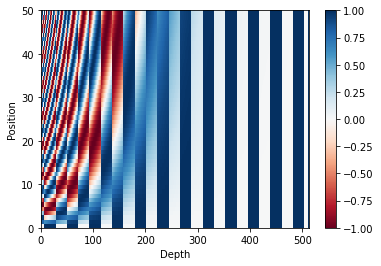

In [ ]:
pos_encoding = positional_encoding(50, 512)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

## Masking

Mask all the pad tokens in the batch of sequence. It ensures that the model does not treat padding as the input. The mask indicates where pad value `0` is present: it outputs a `1` at those locations, and a `0` otherwise.

In [ ]:
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
  
  # add extra dimensions to add the padding
  # to the attention logits.
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [ ]:
x = tf.constant([[7, 6, 0, 0, 1], [1, 2, 3, 0, 0], [0, 0, 0, 4, 5]])
create_padding_mask(x)

<tf.Tensor: shape=(3, 1, 1, 5), dtype=float32, numpy=
array([[[[0., 0., 1., 1., 0.]]],


       [[[0., 0., 0., 1., 1.]]],


       [[[1., 1., 1., 0., 0.]]]], dtype=float32)>

The look-ahead mask is used to mask the future tokens in a sequence. In other words, the mask indicates which entries should not be used.

This means that to predict the third word, only the first and second word will be used. Similarly to predict the fourth word, only the first, second and the third word will be used and so on.

In [ ]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

In [ ]:
x = tf.random.uniform((1, 3))
temp = create_look_ahead_mask(x.shape[1])
temp

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

## Scaled dot product attention

<img src="https://www.tensorflow.org/images/tutorials/transformer/scaled_attention.png" width="500" alt="scaled_dot_product_attention">

The attention function used by the transformer takes three inputs: Q (query), K (key), V (value). The equation used to calculate the attention weights is:

$$\Large{Attention(Q, K, V) = softmax_k(\frac{QK^T}{\sqrt{d_k}}) V} $$

The dot-product attention is scaled by a factor of square root of the depth. This is done because for large values of depth, the dot product grows large in magnitude pushing the softmax function where it has small gradients resulting in a very hard softmax. 

For example, consider that `Q` and `K` have a mean of 0 and variance of 1. Their matrix multiplication will have a mean of 0 and variance of `dk`. Hence, *square root of `dk`* is used for scaling (and not any other number) because the matmul of `Q` and `K` should have a mean of 0 and variance of 1, and you get a gentler softmax.

The mask is multiplied with -1e9 (close to negative infinity). This is done because the mask is summed with the scaled matrix multiplication of Q and K and is applied immediately before a softmax. The goal is to zero out these cells, and large negative inputs to softmax are near zero in the output.

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead) 
  but it must be broadcastable for addition.
  
  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.
    
  Returns:
    output, attention_weights
  """

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
  
  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)  

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

As the softmax normalization is done on K, its values decide the amount of importance given to Q.

The output represents the multiplication of the attention weights and the V (value) vector. This ensures that the words you want to focus on are kept as-is and the irrelevant words are flushed out.

In [ ]:
def print_out(q, k, v):
  temp_out, temp_attn = scaled_dot_product_attention(
      q, k, v, None)
  print ('Attention weights are:')
  print (temp_attn)
  print ('Output is:')
  print (temp_out)

In [ ]:
np.set_printoptions(suppress=True)

temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)

# This `query` aligns with the second `key`,
# so the second `value` is returned.
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [ ]:
# This query aligns with a repeated key (third and fourth), 
# so all associated values get averaged.
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


In [ ]:
# This query aligns equally with the first and second key, 
# so their values get averaged.
temp_q = tf.constant([[10, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0.5 0.5 0.  0. ]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[5.5 0. ]], shape=(1, 2), dtype=float32)


Pass all the queries together.

In [ ]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
Output is:
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


## Multi-head attention

<img src="https://www.tensorflow.org/images/tutorials/transformer/multi_head_attention.png" width="500" alt="multi-head attention">


Multi-head attention consists of four parts:
*    Linear layers and split into heads.
*    Scaled dot-product attention.
*    Concatenation of heads.
*    Final linear layer.

Each multi-head attention block gets three inputs; Q (query), K (key), V (value). These are put through linear (Dense) layers and split up into multiple heads. 

The `scaled_dot_product_attention` defined above is applied to each head (broadcasted for efficiency). An appropriate mask must be used in the attention step.  The attention output for each head is then concatenated (using `tf.transpose`, and `tf.reshape`) and put through a final `Dense` layer.

Instead of one single attention head, Q, K, and V are split into multiple heads because it allows the model to jointly attend to information at different positions from different representational spaces. After the split each head has a reduced dimensionality, so the total computation cost is the same as a single head attention with full dimensionality.

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model
    
    assert d_model % self.num_heads == 0
    
    self.depth = d_model // self.num_heads
    
    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)
    
    self.dense = tf.keras.layers.Dense(d_model)
        
  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])
    
  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]
    
    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)
    
    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)
    
    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)
    
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention, 
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
        
    return output, attention_weights

Create a `MultiHeadAttention` layer to try out. At each location in the sequence, `y`, the `MultiHeadAttention` runs all 8 attention heads across all other locations in the sequence, returning a new vector of the same length at each location.

In [ ]:
temp_mha = MultiHeadAttention(d_model=512, num_heads=8)
y = tf.random.uniform((1, 60, 512))  # (batch_size, encoder_sequence, d_model)
out, attn = temp_mha(y, k=y, q=y, mask=None)
out.shape, attn.shape

(TensorShape([1, 60, 512]), TensorShape([1, 8, 60, 60]))

## Point wise feed forward network

Point wise feed forward network consists of two fully-connected layers with a ReLU activation in between.

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

In [ ]:
sample_ffn = point_wise_feed_forward_network(512, 2048)
sample_ffn(tf.random.uniform((64, 50, 512))).shape

TensorShape([64, 50, 512])

## Encoder and decoder

<img src="https://www.tensorflow.org/images/tutorials/transformer/transformer.png" width="600" alt="transformer">

The transformer model follows the same general pattern as a standard [sequence to sequence with attention model](nmt_with_attention.ipynb). 

* The input sentence is passed through `N` encoder layers that generates an output for each word/token in the sequence.
* The decoder attends on the encoder's output and its own input (self-attention) to predict the next word. 

### Encoder layer

Each encoder layer consists of sublayers:

1.   Multi-head attention (with padding mask) 
2.    Point wise feed forward networks. 

Each of these sublayers has a residual connection around it followed by a layer normalization. Residual connections help in avoiding the vanishing gradient problem in deep networks.

The output of each sublayer is `LayerNorm(x + Sublayer(x))`. The normalization is done on the `d_model` (last) axis. There are N encoder layers in the transformer.

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    
  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)
    
    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
    
    return out2

In [ ]:
sample_encoder_layer = EncoderLayer(512, 8, 2048)

sample_encoder_layer_output = sample_encoder_layer(
    tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

TensorShape([64, 43, 512])

### Decoder layer

Each decoder layer consists of sublayers:

1.   Masked multi-head attention (with look ahead mask and padding mask)
2.   Multi-head attention (with padding mask). V (value) and K (key) receive the *encoder output* as inputs. Q (query) receives the *output from the masked multi-head attention sublayer.*
3.   Point wise feed forward networks

Each of these sublayers has a residual connection around it followed by a layer normalization. The output of each sublayer is `LayerNorm(x + Sublayer(x))`. The normalization is done on the `d_model` (last) axis.

There are N decoder layers in the transformer.

As Q receives the output from decoder's first attention block, and K receives the encoder output, the attention weights represent the importance given to the decoder's input based on the encoder's output. In other words, the decoder predicts the next word by looking at the encoder output and self-attending to its own output. See the demonstration above in the scaled dot product attention section.

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)
 
    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):
    # enc_output.shape == (batch_size, input_seq_len, d_model)

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)
    
    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)
    
    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)
    
    return out3, attn_weights_block1, attn_weights_block2

In [ ]:
sample_decoder_layer = DecoderLayer(512, 8, 2048)

sample_decoder_layer_output, _, _ = sample_decoder_layer(
    tf.random.uniform((64, 50, 512)), sample_encoder_layer_output, 
    False, None, None)

sample_decoder_layer_output.shape  # (batch_size, target_seq_len, d_model)

TensorShape([64, 50, 512])

### Encoder

The `Encoder` consists of:
1.   Input Embedding
2.   Positional Encoding
3.   N encoder layers

The input is put through an embedding which is summed with the positional encoding. The output of this summation is the input to the encoder layers. The output of the encoder is the input to the decoder.

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, 
                                            self.d_model)
    
    
    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
  
    self.dropout = tf.keras.layers.Dropout(rate)
        
  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]
    
    # adding embedding and position encoding.
    x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)
    
    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)
    
    return x  # (batch_size, input_seq_len, d_model)

In [ ]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8, 
                         dff=2048, input_vocab_size=8500,
                         maximum_position_encoding=10000)
temp_input = tf.random.uniform((64, 62), dtype=tf.int64, minval=0, maxval=200)

sample_encoder_output = sample_encoder(temp_input, training=False, mask=None)

print (sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

(64, 62, 512)


### Decoder

 The `Decoder` consists of:
1.   Output Embedding
2.   Positional Encoding
3.   N decoder layers

The target is put through an embedding which is summed with the positional encoding. The output of this summation is the input to the decoder layers. The output of the decoder is the input to the final linear layer.

In [ ]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
    
    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}
    
    x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]
    
    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)
      
      attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
      attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
    # x.shape == (batch_size, target_seq_len, d_model)
    return x, attention_weights

In [ ]:
sample_decoder = Decoder(num_layers=2, d_model=512, num_heads=8, 
                         dff=2048, target_vocab_size=8000,
                         maximum_position_encoding=5000)
temp_input = tf.random.uniform((64, 26), dtype=tf.int64, minval=0, maxval=200)

output, attn = sample_decoder(temp_input, 
                              enc_output=sample_encoder_output, 
                              training=False,
                              look_ahead_mask=None, 
                              padding_mask=None)

output.shape, attn['decoder_layer2_block2'].shape

(TensorShape([64, 26, 512]), TensorShape([64, 8, 26, 62]))

## Create the Transformer

Transformer consists of the encoder, decoder and a final linear layer. The output of the decoder is the input to the linear layer and its output is returned.

In [ ]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, pe_input, pe_target, rate=0.1):
    super(Transformer, self).__init__()

    self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                           input_vocab_size, pe_input, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                           target_vocab_size, pe_target, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
  def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):

    enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)
    
    # dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)
    
    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
    
    return final_output, attention_weights

In [ ]:
sample_transformer = Transformer(
    num_layers=2, d_model=512, num_heads=8, dff=2048, 
    input_vocab_size=8500, target_vocab_size=8000, 
    pe_input=10000, pe_target=6000)

temp_input = tf.random.uniform((64, 38), dtype=tf.int64, minval=0, maxval=200)
temp_target = tf.random.uniform((64, 36), dtype=tf.int64, minval=0, maxval=200)

fn_out, _ = sample_transformer(temp_input, temp_target, training=False, 
                               enc_padding_mask=None, 
                               look_ahead_mask=None,
                               dec_padding_mask=None)

fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)

TensorShape([64, 36, 8000])

## Set hyperparameters

To keep this example small and relatively fast, the values for *num_layers, d_model, and dff* have been reduced. 

The values used in the base model of transformer were; *num_layers=6*, *d_model = 512*, *dff = 2048*. See the [paper](https://arxiv.org/abs/1706.03762) for all the other versions of the transformer.

Note: By changing the values below, you can get the model that achieved state of the art on many tasks.

In [ ]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8

input_vocab_size = tokenizer_pt.vocab_size + 2
target_vocab_size = tokenizer_en.vocab_size + 2
dropout_rate = 0.1

## Optimizer

Use the Adam optimizer with a custom learning rate scheduler according to the formula in the [paper](https://arxiv.org/abs/1706.03762).

$$\Large{lrate = d_{model}^{-0.5} * min(step{\_}num^{-0.5}, step{\_}num * warmup{\_}steps^{-1.5})}$$


In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps
    
  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

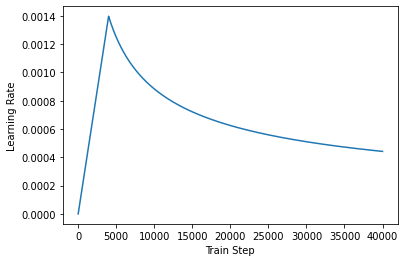

In [ ]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

## Loss and metrics

Since the target sequences are padded, it is important to apply a padding mask when calculating the loss.

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  
  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')

## Training and checkpointing

In [ ]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout_rate)

In [ ]:
def create_masks(inp, tar):
  # Encoder padding mask
  enc_padding_mask = create_padding_mask(inp)
  
  # Used in the 2nd attention block in the decoder.
  # This padding mask is used to mask the encoder outputs.
  dec_padding_mask = create_padding_mask(inp)
  
  # Used in the 1st attention block in the decoder.
  # It is used to pad and mask future tokens in the input received by 
  # the decoder.
  look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
  dec_target_padding_mask = create_padding_mask(tar)
  combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
  return enc_padding_mask, combined_mask, dec_padding_mask

Create the checkpoint path and the checkpoint manager. This will be used to save checkpoints every `n` epochs.

In [ ]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

The target is divided into tar_inp and tar_real. tar_inp is passed as an input to the decoder. `tar_real` is that same input shifted by 1: At each location in `tar_input`, `tar_real` contains the  next token that should be predicted.

For example, `sentence` = "SOS A lion in the jungle is sleeping EOS"

`tar_inp` =  "SOS A lion in the jungle is sleeping"

`tar_real` = "A lion in the jungle is sleeping EOS"

The transformer is an auto-regressive model: it makes predictions one part at a time, and uses its output so far to decide what to do next. 

During training this example uses teacher-forcing (like in the [text generation tutorial](./text_generation.ipynb)). Teacher forcing is passing the true output to the next time step regardless of what the model predicts at the current time step.

As the transformer predicts each word, *self-attention* allows it to look at the previous words in the input sequence to better predict the next word.

To prevent the model from peeking at the expected output the model uses a look-ahead mask.

In [ ]:
EPOCHS = 20

In [ ]:
# The @tf.function trace-compiles train_step into a TF graph for faster
# execution. The function specializes to the precise shape of the argument
# tensors. To avoid re-tracing due to the variable sequence lengths or variable
# batch sizes (the last batch is smaller), use input_signature to specify
# more generic shapes.

train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]
  
  enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
  
  with tf.GradientTape() as tape:
    predictions, _ = transformer(inp, tar_inp, 
                                 True, 
                                 enc_padding_mask, 
                                 combined_mask, 
                                 dec_padding_mask)
    loss = loss_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)    
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
  train_loss(loss)
  train_accuracy(tar_real, predictions)

Portuguese is used as the input language and English is the target language.

In [ ]:
for epoch in range(EPOCHS):
  start = time.time()
  
  train_loss.reset_states()
  train_accuracy.reset_states()
  
  # inp -> portuguese, tar -> english
  for (batch, (inp, tar)) in enumerate(train_dataset):
    train_step(inp, tar)
    
    if batch % 50 == 0:
      print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(
          epoch + 1, batch, train_loss.result(), train_accuracy.result()))
      
  if (epoch + 1) % 5 == 0:
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))
    
  print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, 
                                                train_loss.result(), 
                                                train_accuracy.result()))

  print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 9.0402 Accuracy 0.0000
Epoch 1 Batch 50 Loss 8.9736 Accuracy 0.0018
Epoch 1 Batch 100 Loss 8.8762 Accuracy 0.0124
Epoch 1 Batch 150 Loss 8.7708 Accuracy 0.0182
Epoch 1 Batch 200 Loss 8.6432 Accuracy 0.0223
Epoch 1 Batch 250 Loss 8.4857 Accuracy 0.0266
Epoch 1 Batch 300 Loss 8.3071 Accuracy 0.0318
Epoch 1 Batch 350 Loss 8.1178 Accuracy 0.0360
Epoch 1 Batch 400 Loss 7.9351 Accuracy 0.0392
Epoch 1 Batch 450 Loss 7.7718 Accuracy 0.0418
Epoch 1 Batch 500 Loss 7.6233 Accuracy 0.0441
Epoch 1 Batch 550 Loss 7.4871 Accuracy 0.0471
Epoch 1 Batch 600 Loss 7.3606 Accuracy 0.0501
Epoch 1 Batch 650 Loss 7.2420 Accuracy 0.0532
Epoch 1 Batch 700 Loss 7.1286 Accuracy 0.0561
Epoch 1 Loss 7.1245 Accuracy 0.0561
Time taken for 1 epoch: 116.93007445335388 secs

Epoch 2 Batch 0 Loss 5.5897 Accuracy 0.1022
Epoch 2 Batch 50 Loss 5.5053 Accuracy 0.1005
Epoch 2 Batch 100 Loss 5.4538 Accuracy 0.1028
Epoch 2 Batch 150 Loss 5.3976 Accuracy 0.1052
Epoch 2 Batch 200 Loss 5.3492 Accuracy 0.1074
E

## Evaluate

The following steps are used for evaluation:

* Encode the input sentence using the Portuguese tokenizer (`tokenizer_pt`). Moreover, add the start and end token so the input is equivalent to what the model is trained with. This is the encoder input.
* The decoder input is the `start token == tokenizer_en.vocab_size`.
* Calculate the padding masks and the look ahead masks.
* The `decoder` then outputs the predictions by looking at the `encoder output` and its own output (self-attention).
* Select the last word and calculate the argmax of that.
* Concatentate the predicted word to the decoder input as pass it to the decoder.
* In this approach, the decoder predicts the next word based on the previous words it predicted.

Note: The model used here has less capacity to keep the example relatively faster so the predictions maybe less right. To reproduce the results in the paper, use the entire dataset and base transformer model or transformer XL, by changing the hyperparameters above.

In [ ]:
def evaluate(inp_sentence):
  start_token = [tokenizer_pt.vocab_size]
  end_token = [tokenizer_pt.vocab_size + 1]
  
  # inp sentence is portuguese, hence adding the start and end token
  inp_sentence = start_token + tokenizer_pt.encode(inp_sentence) + end_token
  encoder_input = tf.expand_dims(inp_sentence, 0)
  
  # as the target is english, the first word to the transformer should be the
  # english start token.
  decoder_input = [tokenizer_en.vocab_size]
  output = tf.expand_dims(decoder_input, 0)
    
  for i in range(MAX_LENGTH):
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
        encoder_input, output)
  
    # predictions.shape == (batch_size, seq_len, vocab_size)
    predictions, attention_weights = transformer(encoder_input, 
                                                 output,
                                                 False,
                                                 enc_padding_mask,
                                                 combined_mask,
                                                 dec_padding_mask)
    
    # select the last word from the seq_len dimension
    predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    
    # return the result if the predicted_id is equal to the end token
    if predicted_id == tokenizer_en.vocab_size+1:
      return tf.squeeze(output, axis=0), attention_weights
    
    # concatentate the predicted_id to the output which is given to the decoder
    # as its input.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0), attention_weights

In [ ]:
def plot_attention_weights(attention, sentence, result, layer):
  fig = plt.figure(figsize=(16, 8))
  
  sentence = tokenizer_pt.encode(sentence)
  
  attention = tf.squeeze(attention[layer], axis=0)
  
  for head in range(attention.shape[0]):
    ax = fig.add_subplot(2, 4, head+1)
    
    # plot the attention weights
    ax.matshow(attention[head][:-1, :], cmap='viridis')

    fontdict = {'fontsize': 10}
    
    ax.set_xticks(range(len(sentence)+2))
    ax.set_yticks(range(len(result)))
    
    ax.set_ylim(len(result)-1.5, -0.5)
        
    ax.set_xticklabels(
        ['<start>']+[tokenizer_pt.decode([i]) for i in sentence]+['<end>'], 
        fontdict=fontdict, rotation=90)
    
    ax.set_yticklabels([tokenizer_en.decode([i]) for i in result 
                        if i < tokenizer_en.vocab_size], 
                       fontdict=fontdict)
    
    ax.set_xlabel('Head {}'.format(head+1))
  
  plt.tight_layout()
  plt.show()

In [ ]:
def translate(sentence, plot=''):
  result, attention_weights = evaluate(sentence)
  
  predicted_sentence = tokenizer_en.decode([i for i in result 
                                            if i < tokenizer_en.vocab_size])  

  print('Input: {}'.format(sentence))
  print('Predicted translation: {}'.format(predicted_sentence))
  
  if plot:
    plot_attention_weights(attention_weights, sentence, result, plot)

In [ ]:
translate("este é um problema que temos que resolver.")
print ("Real translation: this is a problem we have to solve .")

Input: este é um problema que temos que resolver.
Predicted translation: this is a problem that we need to solve it .
Real translation: this is a problem we have to solve .


In [ ]:
translate("os meus vizinhos ouviram sobre esta ideia.")
print ("Real translation: and my neighboring homes heard about this idea .")

Input: os meus vizinhos ouviram sobre esta ideia.
Predicted translation: my neighbors have heard about this idea .
Real translation: and my neighboring homes heard about this idea .


In [ ]:
translate("vou então muito rapidamente partilhar convosco algumas histórias de algumas coisas mágicas que aconteceram.")
print ("Real translation: so i 'll just share with you some stories very quickly of some magical things that have happened .")

Input: vou então muito rapidamente partilhar convosco algumas histórias de algumas coisas mágicas que aconteceram.
Predicted translation: so i 'm very quickly to share some stories from some very magical things that happened .
Real translation: so i 'll just share with you some stories very quickly of some magical things that have happened .


You can pass different layers and attention blocks of the decoder to the `plot` parameter.

Input: este é o primeiro livro que eu fiz.
Predicted translation: this is the first book i did .


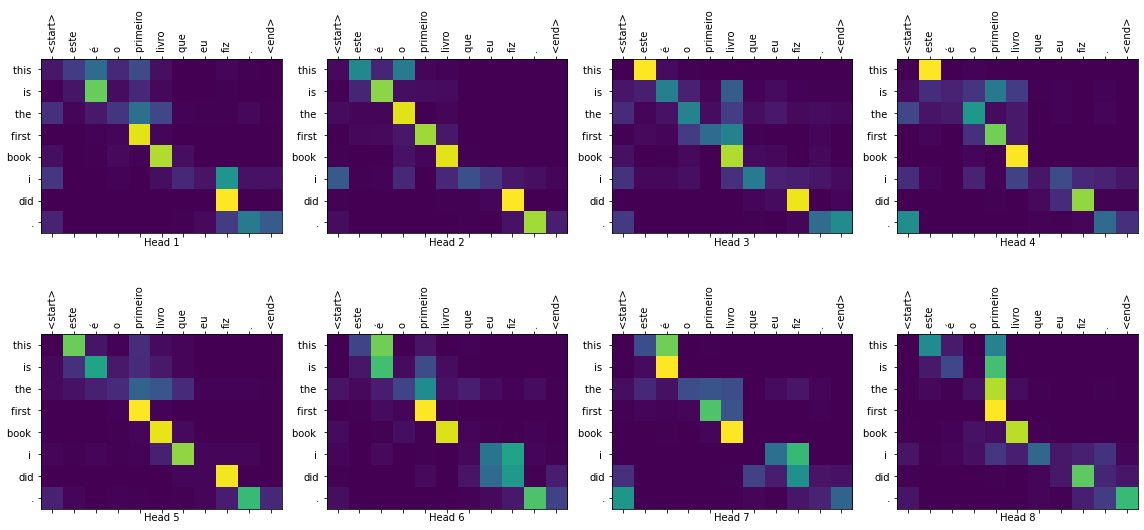

Real translation: this is the first book i've ever done.


In [ ]:
translate("este é o primeiro livro que eu fiz.", plot='decoder_layer4_block2')
print ("Real translation: this is the first book i've ever done.")

## Summary

In this tutorial, you learned about positional encoding, multi-head attention, the importance of masking and how to create a transformer.

Try using a different dataset to train the transformer. You can also create the base transformer or transformer XL by changing the hyperparameters above. You can also use the layers defined here to create [BERT](https://arxiv.org/abs/1810.04805) and train state of the art models. Futhermore, you can implement beam search to get better predictions.